# Tutorial

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2019-11-26 12:35:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   126MB/s    in 1.1s    

2019-11-26 12:35:38 (126 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
 
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [0]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse47-2.png', 'horse15-4.png', 'horse04-0.png', 'horse04-3.png', 'horse05-7.png', 'horse40-1.png', 'horse37-4.png', 'horse19-4.png', 'horse32-4.png', 'horse28-9.png']
['human12-30.png', 'human05-22.png', 'human09-10.png', 'human05-25.png', 'human04-01.png', 'human07-01.png', 'human01-28.png', 'human04-27.png', 'human08-05.png', 'human15-03.png']


In [0]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [0]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

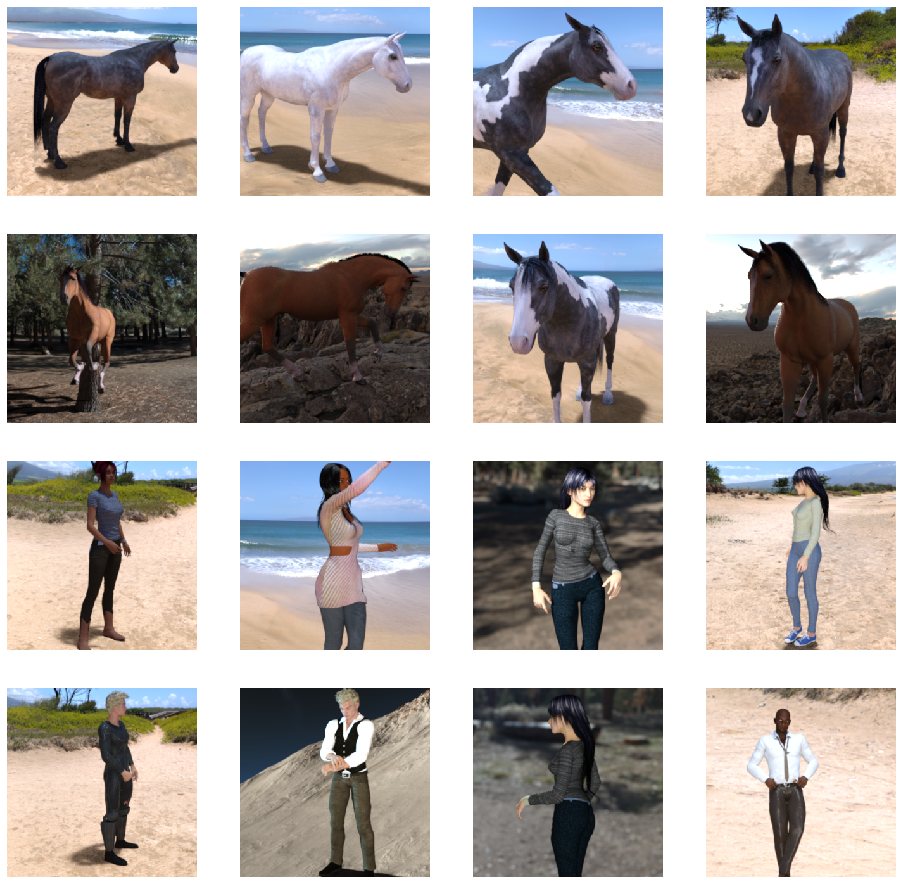

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 90s 11s/step - loss: 0.7981 - acc: 0.4854
Epoch 2/15
8/8 [==============================] - 67s 8s/step - loss: 0.8583 - acc: 0.6744
Epoch 3/15
8/8 [==============================] - 77s 10s/step - loss: 1.7428 - acc: 0.7608
Epoch 4/15
8/8 [==============================] - 87s 11s/step - loss: 0.3064 - acc: 0.8652
Epoch 5/15
8/8 [==============================] - 68s 8s/step - loss: 0.1628 - acc: 0.9238
Epoch 6/15
8/8 [==============================] - 77s 10s/step - loss: 0.3304 - acc: 0.8865
Epoch 7/15
8/8 [==============================] - 87s 11s/step - loss: 0.1177 - acc: 0.9561
Epoch 8/15
8/8 [==============================] - 77s 10s/step - loss: 0.1088 - acc: 0.9488
Epoch 9/15
8/8 [==============================] - 77s 10s/step - loss: 0.1285 - acc: 0.9344
Epoch 10/15
8/8 [==============================] - 72s 9s/step - loss: 0.0955 - acc: 0.9633
Epoch 11/15
8/8 [==============================] - 77s 10s/step - loss: 0.0226 - a

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


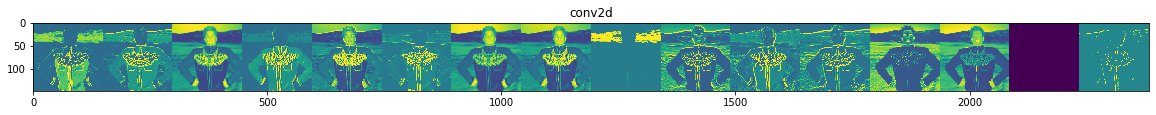

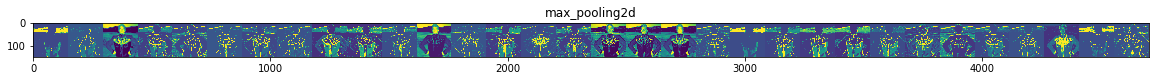

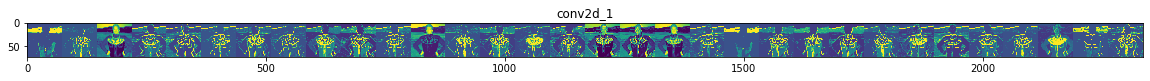

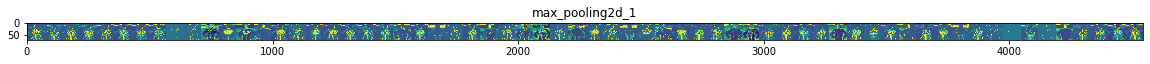

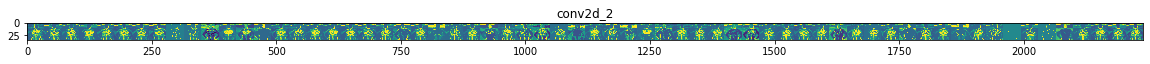

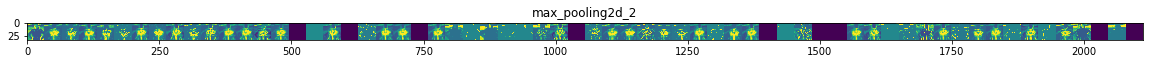

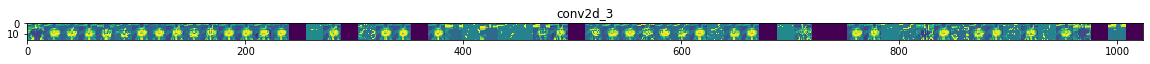

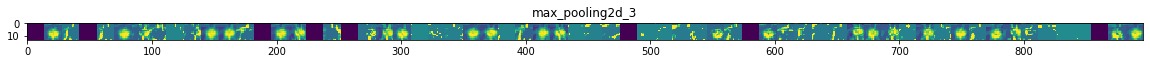

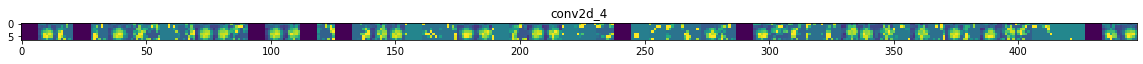

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Exercise1

In [1]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [3]:
!ls -a

.  ..  .config	.kaggle  sample_data


In [0]:
import json
token = {"username":"jafarshodiq","key":"6dd1204b0c26f555c9de51f6d956a8b6"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [0]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [9]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!kaggle datasets download -d saroz014/plant-disease -p /content

 99% 1.59G/1.60G [00:23<00:00, 28.6MB/s]
100% 1.60G/1.60G [00:23<00:00, 71.6MB/s]


In [0]:
!unzip \plant-disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a32428-0d45-4851-bb62-c1a669854990___YLCV_NREC 2630.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a5145b-57e9-4605-8ba3-1fb90f61d460___YLCV_NREC 0108.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a73727-237f-40e0-b7e1-95bf4d0eb756___YLCV_GCREC 5343.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43aae6d1-40ae-42f4-8b71-ae9351683a90___UF.GRC_YLCV_Lab 02661.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43b2be62-cb86-46f4-9049-92e77d4f335b___YLCV_NREC 0074.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43b8aec7-59df-413d-9afd-9cbf481695fd___UF.GRC_YLCV_Lab 09423.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43bbb298-8079-42f6-9be7-b88957cc8846___UF.GRC_YLCV_Lab 09341.JPG  
  inflating: dataset/train/Tomato___Tomato_Ye

In [0]:
import os
train_grape_dir = os.path.join('/content/dataset/train/Grape___healthy/')
train_strawberry_dir = os.path.join('/content/dataset/train/Strawberry___healthy/')

In [0]:
train_grape_names = os.listdir(train_grape_dir)
print(train_grape_names[:10])
train_strawberry_names = os.listdir(train_strawberry_dir)
print(train_strawberry_names[:10])

['fd3c8bea-70d4-4526-8a83-f89c567b65ed___Mt.N.V_HL 6059.JPG', 'b67328d6-9735-4220-83a6-3b3568162527___Mt.N.V_HL 6169.JPG', 'e97052d8-edd8-4e09-bdbb-c1c312d2c833___Mt.N.V_HL 8926.JPG', 'f429e685-fc81-40a9-827f-30a259a9387d___Mt.N.V_HL 6183.JPG', '11a9b188-754b-45b5-a498-590bfdeb2643___Mt.N.V_HL 6159.JPG', '2383094b-208b-472d-9711-e35dbee4b7b9___Mt.N.V_HL 6114.JPG', '8c5181ab-8b06-41a8-9b26-b3be052dcea1___Mt.N.V_HL 8905.JPG', '629195e5-85c1-444f-bd02-0fb635586d8e___Mt.N.V_HL 6079.JPG', '61c3750a-b90a-4d1b-b907-8683be4faa13___Mt.N.V_HL 9084.JPG', '57540d89-7300-46fa-bd28-1aa3733e0757___Mt.N.V_HL 9039.JPG']
['a5db3b2a-9806-45c1-b1f8-9d6f414222f2___RS_HL 2067.JPG', 'b127a511-d0ce-4fdc-bbe6-6c2a2e2dcf1f___RS_HL 1816.JPG', 'd1aee44a-b6bb-45b9-b7b6-5d553add8fd1___RS_HL 2163.JPG', '8df11a1a-0e18-4757-848b-e3901e9fbd2f___RS_HL 1626.JPG', 'fdc2ad6e-3ed2-46be-b862-2475be5cc19a___RS_HL 4570.JPG', 'c0cd3f14-d2b4-43b5-a81d-0dc60767e52b___RS_HL 4539.JPG', 'caa6652b-d711-46cb-a216-70028258982f___RS_HL 

In [0]:
print('total training grape images:', len(os.listdir(train_grape_dir)))
print('total training strawberry images:', len(os.listdir(train_strawberry_dir)))

total training grape images: 339
total training strawberry images: 365


In [0]:
os.makedirs('data/train/grape')
os.makedirs('data/train/strawberry')

In [0]:
import shutil
#train
for f in train_grape_names:
  shutil.copy(train_grape_dir+f, 'data/train/grape')
for f in train_strawberry_names:
  shutil.copy(train_strawberry_dir+f, 'data/train/strawberry')

In [0]:
train_dir = os.path.join('data/train')

In [0]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0

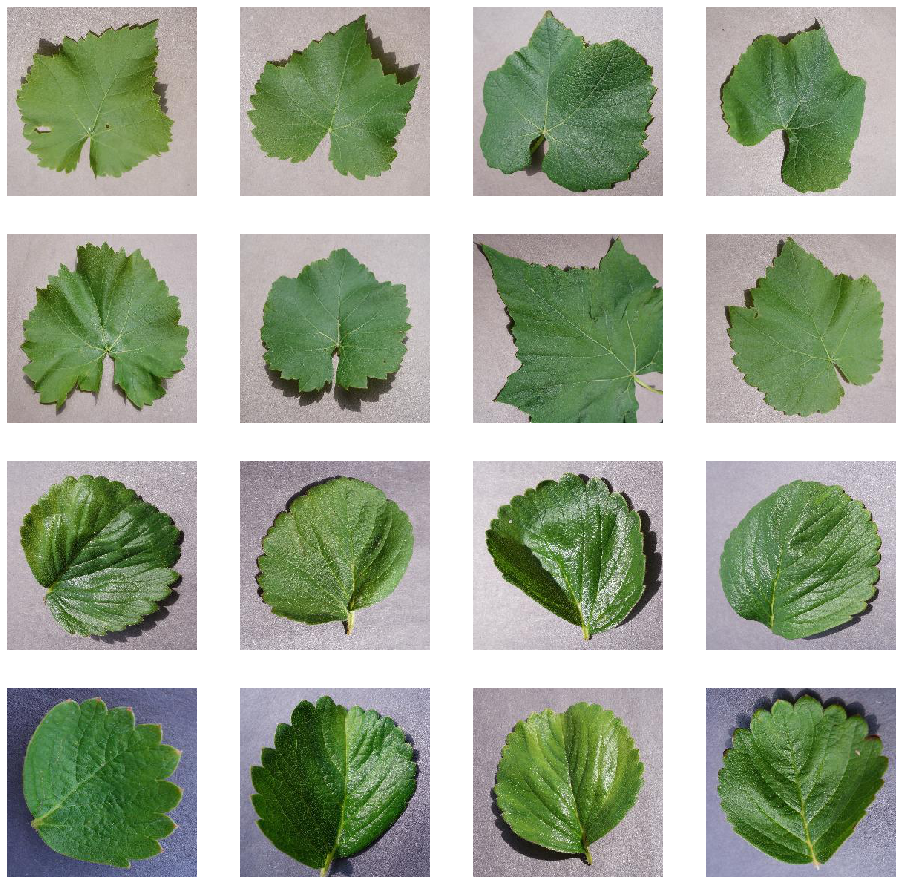

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_grape_pix = [os.path.join(train_grape_dir, fname) 
                for fname in train_grape_names[pic_index-8:pic_index]]
next_strawberry_pix = [os.path.join(train_strawberry_dir, fname) 
                for fname in train_strawberry_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_grape_pix+next_strawberry_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

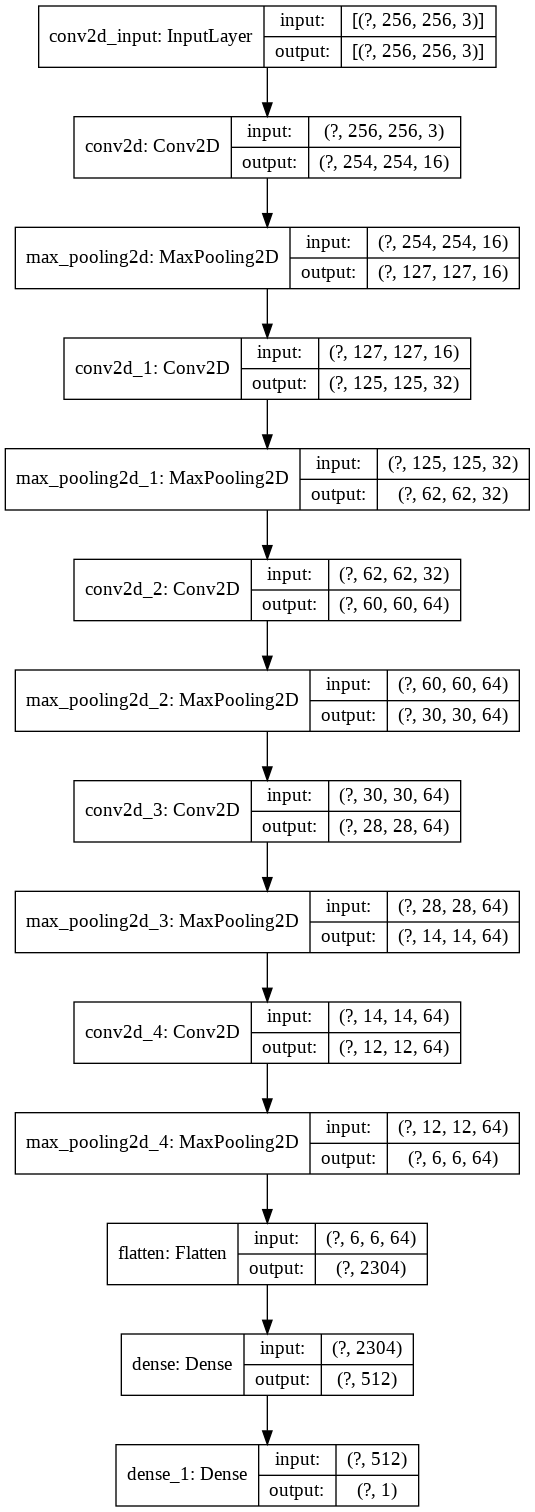

In [0]:
from tensorflow import keras
#plot model
keras.utils.plot_model(model, "arsitektur_model.png", show_shapes=True)

In [0]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 704 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 8s 1s/step - loss: 0.8206 - acc: 0.5022
Epoch 2/15
8/8 [==============================] - 2s 265ms/step - loss: 0.7417 - acc: 0.5323
Epoch 3/15
8/8 [==============================] - 2s 264ms/step - loss: 0.7031 - acc: 0.6052
Epoch 4/15
8/8 [==============================] - 2s 268ms/step - loss: 0.8250 - acc: 0.7844
Epoch 5/15
8/8 [==============================] - 2s 273ms/step - loss: 0.6398 - acc: 0.7406
Epoch 6/15
8/8 [==============================] - 2s 261ms/step - loss: 0.7637 - acc: 0.8225
Epoch 7/15
8/8 [==============================] - 2s 246ms/step - loss: 0.3996 - acc: 0.8426
Epoch 8/15
8/8 [==============================] - 2s 268ms/step - loss: 0.2712 - acc: 0.8885
Epoch 9/15
8/8 [==============================] - 2s 265ms/step - loss: 0.3484 - acc: 0.8562
Epoch 10/15
8/8 [==============================] - 2s 288ms/step - loss: 0.1440 - acc: 0.9469
Epoch 11/15
8/8 [==============================] - 2s 248ms/step - loss:

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a healthy strawberry leaf")
  else:
    print(fn + " is a healthy grape leaf")

Saving absensi-boat.jpg to absensi-boat.jpg
[1.]
absensi-boat.jpg is a healthy strawberry leaf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


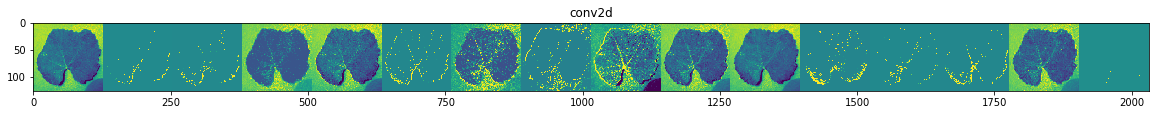

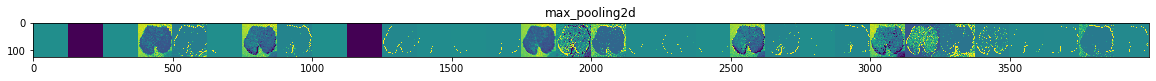

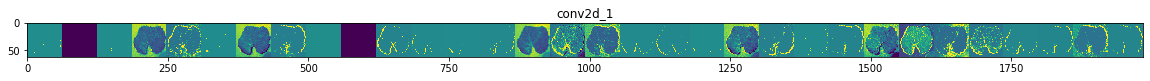

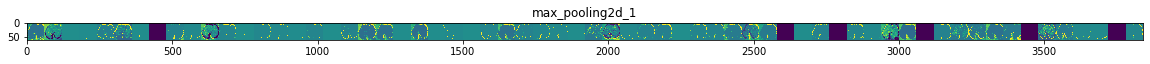

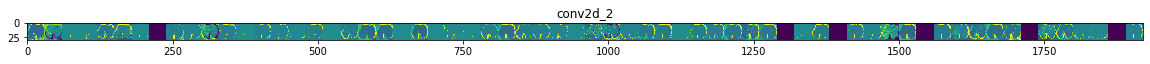

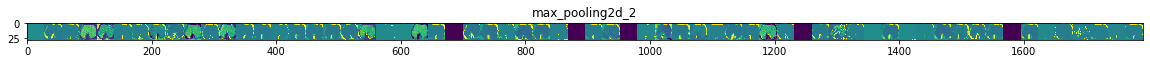

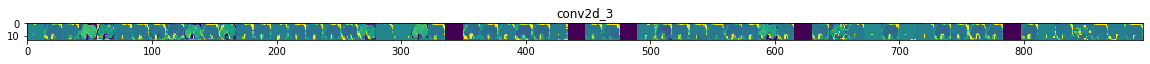

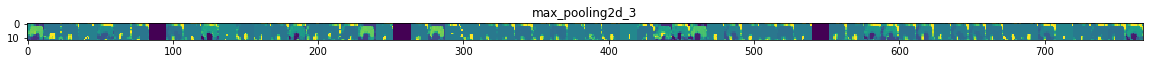

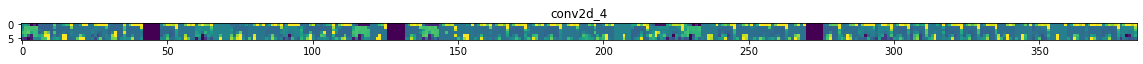

In [0]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
grape_img_files = [os.path.join(train_grape_dir, f) for f in train_grape_names]
strawberry_img_files = [os.path.join(train_strawberry_dir, f) for f in train_strawberry_names]
img_path = random.choice(grape_img_files + strawberry_img_files)
 
img = load_img(img_path, target_size=(256, 256))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
 
# Rescale by 1/255
x /= 255
 
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
 
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
 
# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')